id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
num           0
dtype: int64


<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Партос\AppData\Local\Temp\ipykernel_31036\3341804215.py:6: SyntaxWarning: invalid escape sequence '\A'
  file_path = 'D:\Andrushak\data\heart_disease_uci.csv'  # Замініть на фактичний шлях до вашого файлу


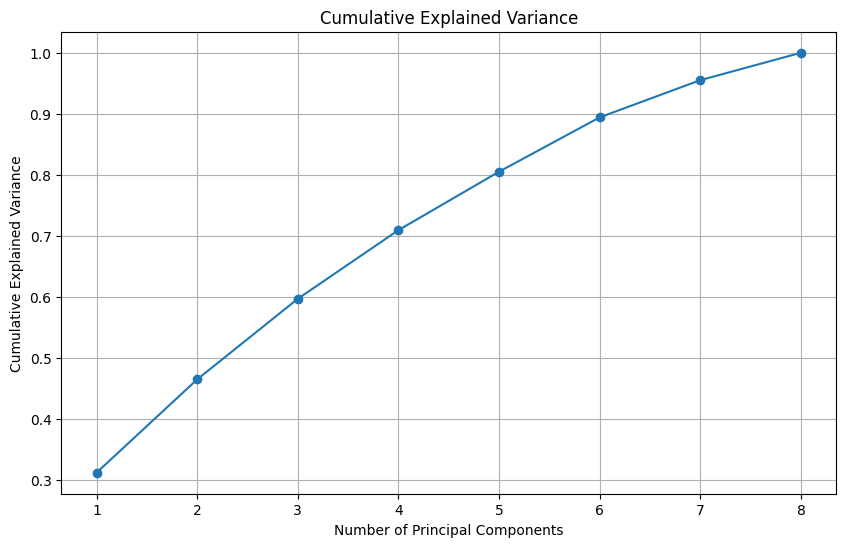

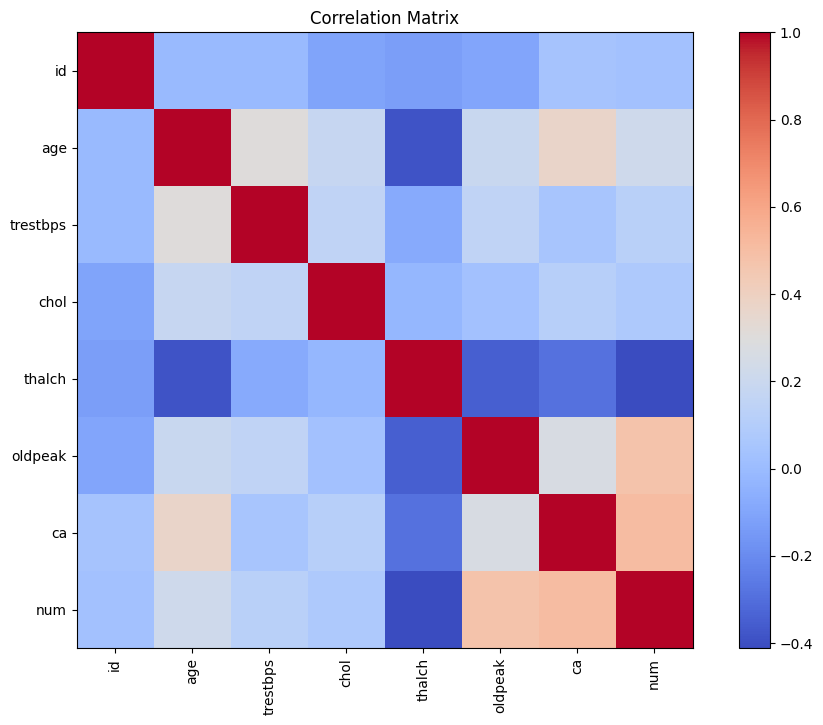

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Вкажіть шлях до вашого завантаженого файлу
file_path = 'D:\Andrushak\data\heart_disease_uci.csv'  # Замініть на фактичний шлях до вашого файлу

# Завантаження датасету
df = pd.read_csv(file_path)

# Вибір лише числових стовпців
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Перевірка на пропущені значення
print(numeric_df.isnull().sum())

# Видалення рядків з пропущеними значеннями
numeric_df = numeric_df.dropna()

# Функція для видалення аномалій
def remove_outliers(df, columns, threshold=3):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df = df[np.abs(df[column] - mean) <= (threshold * std)]
    return df

# Видалення аномалій з числових колонок
numeric_columns = numeric_df.columns
numeric_df = remove_outliers(numeric_df, numeric_columns)

# Вибір лише числових стовпців після видалення аномалій
numeric_df = numeric_df.select_dtypes(include=['int64', 'float64'])

# Масштабування даних
scaled_data = (numeric_df - numeric_df.mean()) / numeric_df.std()

# Обчислення коваріаційної матриці
cov_matrix = np.cov(scaled_data, rowvar=False)

# Обчислення власних значень та власних векторів коваріаційної матриці
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Відсортуйте власні значення в спадному порядку
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Обчислення кумулятивної поясненої дисперсії
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Виведемо діаграму кумулятивної поясненої дисперсії
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Побудова кореляційної матриці
correlation_matrix = numeric_df.corr()

# Відобразимо кореляційну матрицю за допомогою теплової карти
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(numeric_df.columns)), numeric_df.columns, rotation=90)
plt.yticks(np.arange(len(numeric_df.columns)), numeric_df.columns)
plt.show()
